# Regression Evaluation

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import scipy.stats as stats
import sklearn.metrics
from sklearn.linear_model import LinearRegression

Punchline: is our model better than the model that just predicts the average?

The best model we can make with no additional information: $\hat{y} = \bar{y}$

**Baseline comes from train split!**

## Setup / Functions

In [2]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) ** 2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [3]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
        'r2': r2_score(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    sse_baseline = sse(actual, actual.mean())
    sse_model = sse(actual, predicted)
    return sse_model < sse_baseline

## Use the Functions

### tips

In [4]:
tips = pydataset.data('tips')
model = LinearRegression().fit(tips[['total_bill']], tips.tip)

In [5]:
# we can use the fit model on new data
new_data = pd.Series([10, 20], name='total_bill').values.reshape(-1, 1)
model.predict(new_data)

array([1.97051479, 3.02075996])

In [6]:
actual = tips.tip
predicted = model.predict(tips[['total_bill']])

In [7]:
model2 = LinearRegression().fit(tips[['size']], tips.tip)
predicted2 = model2.predict(tips[['size']])

In [8]:
regression_errors(actual, predicted2)

sse     353.834427
ess     111.378050
tss     465.212477
mse       1.450141
rmse      1.204218
r2        0.239413
dtype: float64

In [9]:
regression_errors(actual, predicted)

sse     252.788744
ess     212.423733
tss     465.212477
mse       1.036019
rmse      1.017850
r2        0.456617
dtype: float64

In [10]:
regression_errors(actual, predicted)['sse'] < regression_errors(actual, predicted2)['sse']

True

In [11]:
better_than_baseline(actual, predicted)

True

In [12]:
pd.DataFrame({
    'model 1 (tip ~ total_bill)': regression_errors(actual, predicted),
    'model 2 (tip ~ size)': regression_errors(actual, predicted2),
    'baseline model': regression_errors(actual, np.repeat(actual.mean(), actual.shape[0]))
})

,model 1 (tip ~ total_bill),model 2 (tip ~ size),baseline model
sse,252.788744,353.834427,465.212477
ess,212.423733,111.378050,0.000000
tss,465.212477,465.212477,465.212477
mse,1.036019,1.450141,1.906609
rmse,1.017850,1.204218,1.380800
r2,0.456617,0.239413,0.000000


#### Sidenote: comparing our r2 to sklearn's

In [13]:
sklearn_r2 = sklearn.metrics.r2_score(actual, predicted)

In [14]:
our_r2 = r2_score(actual, predicted)

In [15]:
our_r2 == sklearn_r2

False

In [16]:
our_r2, sklearn_r2

(0.45661658635167607, 0.45661658635167657)

In [17]:
np.isclose(our_r2, sklearn_r2)

True

In [18]:
print('our mse', mse(actual, predicted))
print('sklearn', sklearn.metrics.mean_squared_error(actual, predicted))

our mse 1.036019442011377
sklearn 1.036019442011377


### mpg

In [19]:
mpg = pydataset.data('mpg')

In [20]:
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [21]:
actual = mpg.hwy # y
predicted = model.predict(mpg[['displ']]) # yhat

In [22]:
regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [23]:
better_than_baseline(actual, predicted)

True

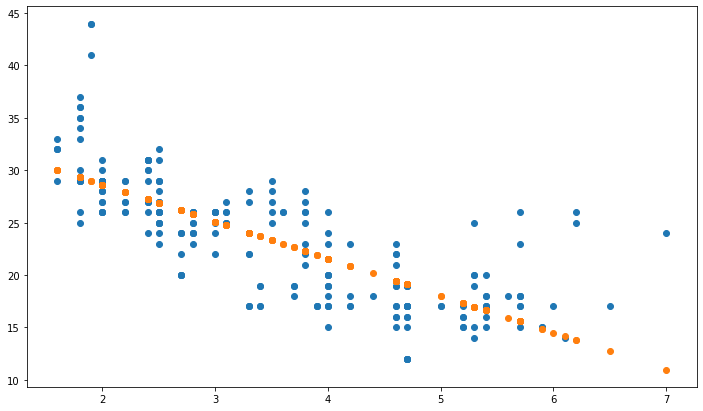

In [24]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, predicted, label='prediction')

Sidenote: visualizing residuals w/ multiple independent variables

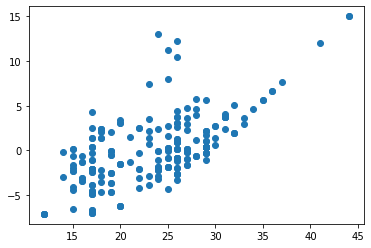

In [25]:
plt.scatter(mpg.hwy, actual - predicted)

(array([15., 12., 18., 44., 48., 33., 29., 17.,  6.,  3.,  2.,  1.,  2.,
         2.,  2.]),
 array([-7.10388366, -5.62959357, -4.15530348, -2.68101339, -1.2067233 ,
         0.26756678,  1.74185687,  3.21614696,  4.69043705,  6.16472714,
         7.63901723,  9.11330732, 10.58759741, 12.0618875 , 13.53617759,
        15.01046768]),
 <BarContainer object of 15 artists>)

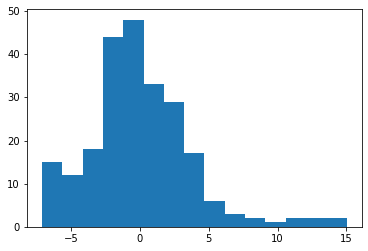

In [26]:
plt.hist(actual - predicted, bins=15)